
# 💼Bank Customer Information and Marketing Response

This dataset contains information about bank customers and their responses to marketing campaigns. The dataset includes demographic and financial characteristics of customers, such as age, job, marital status, education level, and balance in their accounts. Additionally, it includes information about their response to marketing campaigns, such as whether they subscribed to a term deposit (yes/no) and the outcome of the marketing campaign (success/failure).

The dataset aims to help understand the factors that influence a customer's decision to subscribe to a term deposit and the effectiveness of marketing campaigns. It can be used for predictive modeling, data analysis, and machine learning tasks to identify patterns and relationships between customer characteristics and marketing outcomes.

Key Features:

Demographic information (age, job, marital status, education level)

Financial information (account balance, housing loan, personal loan)

Marketing campaign information (campaign duration, number of contacts, outcome)

Response to marketing campaign (subscription to term deposit, yes/no)

Target Variable:

y (subscription to term deposit, yes/no)

Number of Instances:

5 (in the provided sample, but the actual dataset may have more instances)

Number of Attributes:

16 (including the target variable)

1. Dataset Overview:

• Provide a basic overview of the dataset, including details such as feature names, target variable, presence of missing values, and identification of categorical features.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Load dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [21]:

# Overview of the dataset
# 1. Display basic information about the dataset including column names and types
print("Dataset Information:")
print(data.info())
print()
print()
# 2. Display summary statistics of the numerical features
print("\nSummary Statistics:")
print(data.describe())
print()
print()
# 3. Check for missing values in each column
print("\nMissing Values per Column:")
print(data.isnull().sum())  # Check for missing values
print()
print()
# Get the dataset features
data.columns


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None



Summary Statistics:
               age       balance          day     

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
# Dataset shape
print(data.shape)
print()
# Separate numerical and categorical features from the dataset
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Print the names of numerical and categorical features
print("Numerical Features:")
print(numerical_features)
print()
print("Categorical Features:")
print(categorical_features)

(4521, 17)

Numerical Features:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


I observed 4521 entries and 17 features with no missing entries from the
previous output. We have 7 numerical and 10 categorical features listed above in my code output.
My target variable in this dataset is the (subscription to term deposit, yes/no) labelled "y" and the rest of the feature (16) would be my independent variable.

2. Data Preprocessing:

• Describe how you would preprocess the dataset before building a Decision Tree model. Discuss steps such as handling missing values, encoding categorical features, and scaling features if necessary.

• Provide the code for each preprocessing step and explain why these steps are important for decision trees.

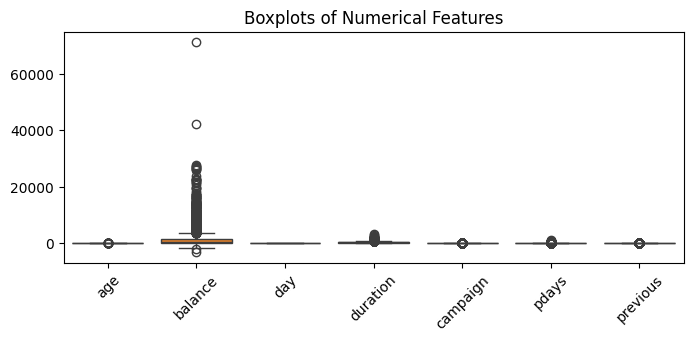

In [23]:
# After getting the summary statistics of the dataset, I visualized each numerical feature to understand the dataset better. And I can see that the data points are imbalance



# # Plot histograms for each numerical feature
# data.hist(bins=20, figsize=(15, 10))
# plt.suptitle("Histograms of Numerical Features", fontsize=16)
# plt.show()


# Plot boxplots for each numerical feature
plt.figure(figsize=(8, 3))
sn.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

After getting the summary statistics of the dataset, I visualized each numerical feature to understand the dataset better. I can see that the data points are imbalanced. There is a huge gap between the entries.


Since I will be using all the features in my dataset, I would need to convert my categorical entries into numerical.

I did so using the LabelEncoder package.

In [24]:
# Initialize LabelEncoder using the following package: from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# Apply LabelEncoder to each categorical column
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    data[col] = label.fit_transform(data[col])# print(data.to_string())
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


In [11]:
# Splitting the data into features and target
X = data.drop('y', axis=1)  # Replace 'y' with the name of the target column
y = data['y']

# Check the distribution of target classes
print(y.value_counts())

# Scaling of the dataset (data normalization) before processing.
# I used the following package: from sklearn.preprocessing import StandardScaler
norms = StandardScaler()
X = norms.fit_transform(X)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set using the following package: from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of target classes after SMOTE
print(y_train_smote.value_counts())


y
0    4000
1     521
Name: count, dtype: int64
y
0    3193
1    3193
Name: count, dtype: int64


The target "y" variable was highly imbalanced before we applied the SMOTE package on the train set.  

When working on a classification problem and the classes in the target variable are highly imbalanced (e.g., 90% of class "no" and 10% of class "yes"), SMOTE can help balance the dataset by generating synthetic samples for the minority class.


The rest of the dataset was scaled (normalized) using the StandardScaler package.

3. Model Implementation:

• Implement a Decision Tree classifier using Scikit-learn.

• Explain how you would split the data into training and testing sets, train the model, and evaluate it using appropriate metrics.

• Include the code and interpretation of the results.

In [12]:
# Decision Tree Classifier implementation.
clf = DecisionTreeClassifier()
clf.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier()

This test_size=0.2 argument in the train_test_split() function means 20% of the dataset is allocated to the test set, and 80% is used for training.


Accuracy of the Decision Tree classifier on test set: 0.8298342541436464

Report of the Decision Tree classifier on test set: 0.8298342541436464

Confusion Matrix:
[[710  97]
 [ 57  41]]


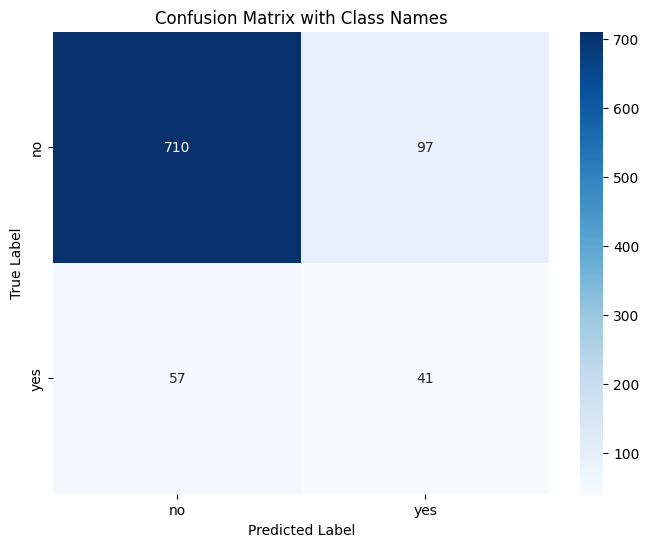

In [13]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

# Checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nAccuracy of the Decision Tree classifier on test set:", accuracy)
print("\nReport of the Decision Tree classifier on test set:", accuracy)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 4: Plot the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
# disp.plot()

# coolwarm
class_names = ['no', 'yes']

plt.figure(figsize=(8, 6))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Names')
plt.show()


704 true negatives (correct "No" predictions)

103 false positives (predicted "Yes" but should have been "No")

53 false negatives (predicted "No" but should have been "Yes")

45 true positives (correct "Yes" predictions)


In [14]:
# Convert from numpy to dataframe for the tree.

X = pd.DataFrame(X, columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.711861,-0.576829,-0.407218,-0.320413,0.444413
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.169194,-0.576829,2.989044,2.041734,-2.579961
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.303898,-0.576829,2.899143,0.270124,-2.579961
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.250017,0.387967,-0.407218,-0.320413,0.444413
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.146102,-0.576829,-0.407218,-0.320413,0.444413


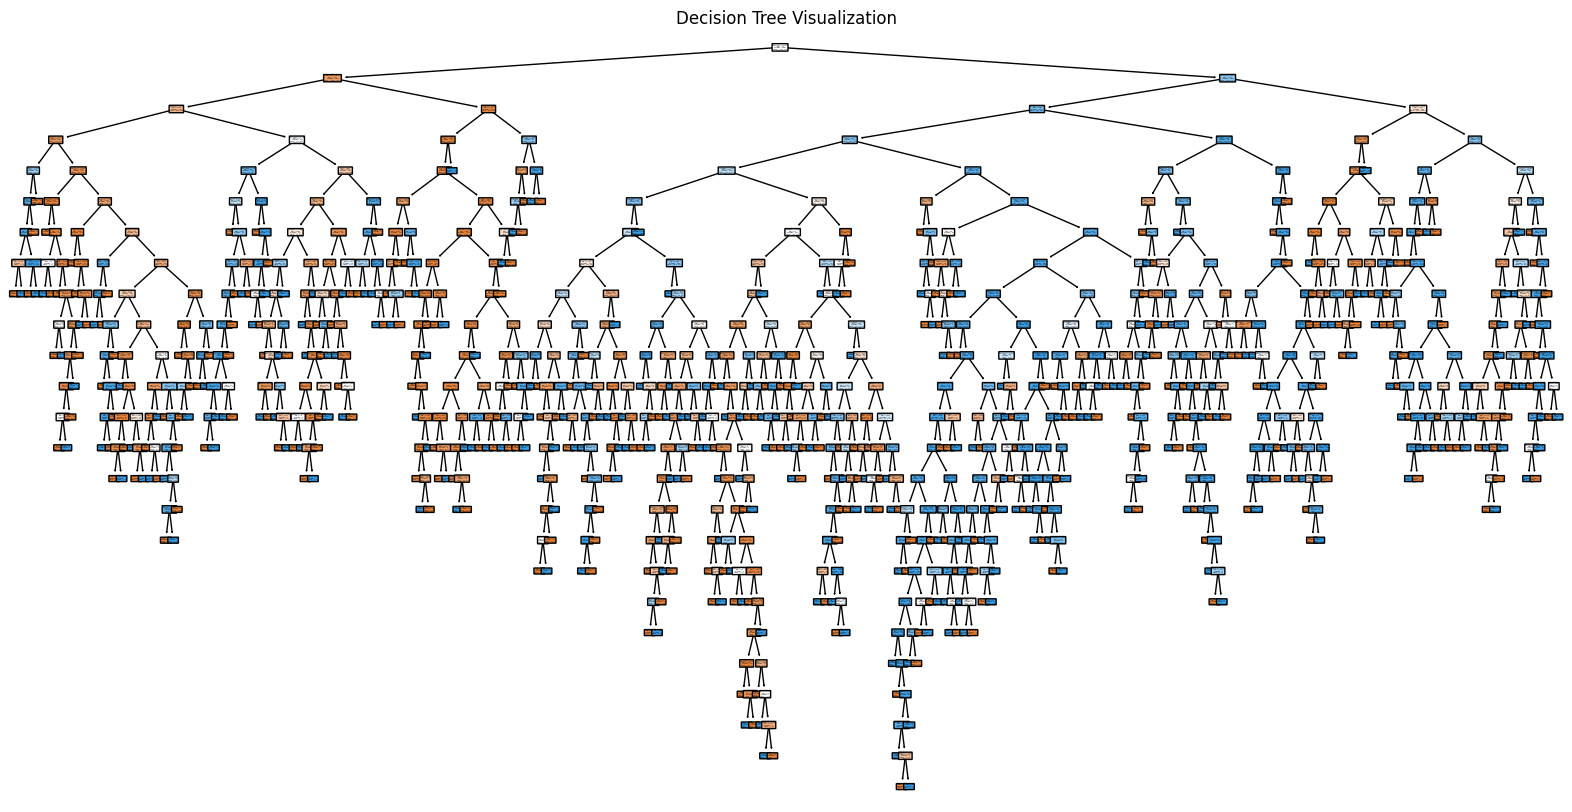

In [15]:
# Assuming 'model' is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust the size to make it more readable
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

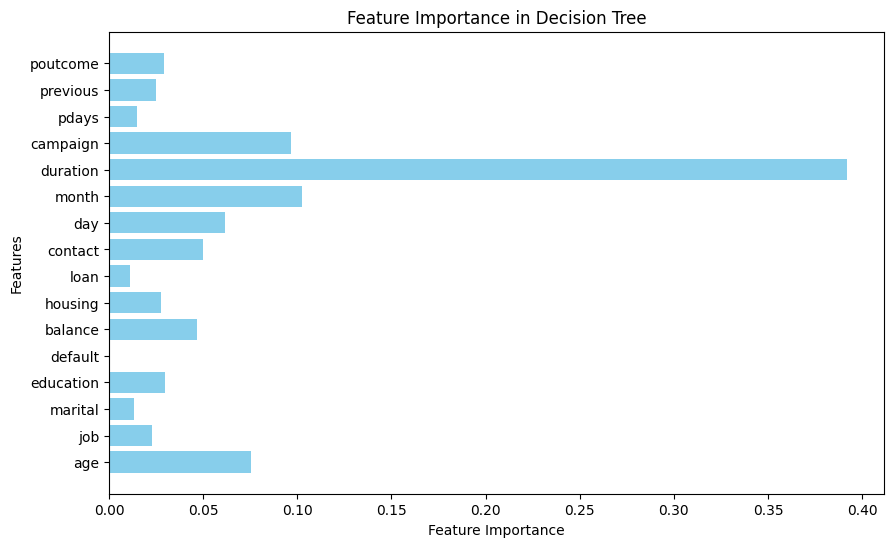

In [17]:
# Extract feature importances
feature_importance = clf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

Most Important Features:

The feature duration has the highest importance score, significantly larger than the others. This suggests that the duration of the call is the most influential factor in predicting whether a customer will subscribe. This is intuitive, as customers who stay on a call longer might be more interested or engaged.
The month and campaign features also show notable importance, though much less than duration. month might indicate seasonal trends, and campaign suggests how the number of calls influences the outcome.



Less Important Features:

Features like pdays, housing, loan, job, and marital have very low importance scores, indicating that they contribute minimally to the decision-making process of the model.
These features along with the rest showing less importance scores could be removed. Removing features with low importance could reduce model complexity and training time. This can also help prevent overfitting.


To a non-technical audience

From the model's perspective, customers who engage in longer conversations are significantly more likely to subscribe, which makes sense because longer conversations often indicate genuine interest. The time of the year also plays a role, as does the number of times a customer is contacted.
So we might need to focus more on how to increase meaningful engagement during calls with the customers.